In [98]:
using DifferentialEquations
using Plots
using Statistics
using LinearAlgebra
using DiffEqParamEstim

In [99]:
phi(a, gamma_a) = a ./ (a + gamma_a)

phi (generic function with 1 method)

In [100]:
function f_old(du,u,p0,t)
    B, E, M, a, h, p = u
    betaa, betab, betaE1, betaE2, betah1, betah2, betaM1, betaM2, betap, gammaa, gammaB, gammah, gammap, muaE, muaM, muhM, mupB, mupE, q = p0

    du[1]= betab.*phi(u[6],gammap).*u[1] - q.*u[1]
    du[2] = (betaE1.*phi(u[4], gammaa) + betaE2.*(1-phi(u[1], gammaB)).*phi(u[6], gammap)).*u[2] - q.*u[2]
    du[3] = (betaM1.*phi(u[4], gammaa) + betaM2.*phi(u[5], gammah)).*u[3] - q.*u[3]

    du[4] = betaa.*phi(u[6], gammap).*u[1] - q.*u[4] - (muaE.*u[2] + muaM.*u[3]).*u[4]
    du[5] = betah1.*phi(u[4], gammaa).*u[2] + betah2.*phi(u[6], gammap).*u[1] - q.*u[5] - muhM.*u[5].*u[3]
    du[6] = betap.*q.*(cos.(t)+1).^3 - q.*u[6] - (mupB.*u[1] + mupE.*u[2]).*u[6]
end


f_old (generic function with 1 method)

In [101]:
function f(du,u,p0,t)
    B, E, M, a, h, p = u
    betaa, betab, betaE1, betaE2, betah1, betah2,betah3, betaM1, betaM2, betap, gammaa, gammaB, gammah, gammap, muaE, muaM, muhM, mupB, mupE, q = p0

    du[1]= betab.*phi(p,gammap).*B - q.*B
    du[2] = (betaE1.*phi(a, gammaa) + betaE2.*(1-phi(B, gammaB)).*phi(p, gammap)).*E - q.*E
    du[3] = (betaM1.*phi(a, gammaa) + betaM2.*phi(h, gammah)).*M - q.*M

    du[4] = betaa.*phi(p, gammap).*B - q.*a - (muaE.*E + muaM.*M).*phi(a, gammaa)
    du[5] = betah1.*phi(a, gammaa).*E + betah2.*phi(p, gammap).*B + betah3.*(1-phi(B,gammaB)).*phi(p,gammap)*E- q.*h- muhM.*phi(h, gammah).*M
    du[6] = betap.*q.*(cos.(t)+1).^3 - q.*p - (mupB.*B + mupE.*(1-phi(B, gammaB)).*E).*phi(p, gammap)
end

f (generic function with 1 method)

In [102]:
# betaa, betab, betaE1, betaE2, betah1, betah2, betaM1, betaM2, betap, gammaa, gammaB, gammah, gammap, muaE, muaM, muhM, mupB, mupE, q
u0 = [0.0004706; 0.0004706; 0.0004706; 9.7079; 7.9551; 32.061]
tspan = (0.0,15000.0);
p = [3e5, # betaa 1e7
    1.2, # betab
    0.8, # betaE1
    0.6, # betaE2
    400, #betah1 150
    33000, #betah2
    10000,  #betah3                   
    0.827, #betaM1 0.8
    0.5, #betaM2
    1000, #betap 10000
    200, #gammaa
    10, # gammaB
    150, #gammah
    400, # gammap 400
    50000, # muaE 25000
    40000, # muaM 50000
    3000, # muhM 400
    200000, #mupB
    5000000, #mupE
    0.05]

# solve the ODE
prob = ODEProblem(f,u0,tspan,p)
sol = solve(prob);#, Rosenbrock23())


In [103]:
mean(sol, dims = 2)

6×1 Matrix{Float64}:
  0.00022842942602653116
  0.0005935940128501042
  0.0012823139480216425
  6.003954733546649
  7.569570595898936
 13.495119013216025

In [104]:
mean(sol, dims = 2)

6×1 Matrix{Float64}:
  0.00022842942602653116
  0.0005935940128501042
  0.0012823139480216425
  6.003954733546649
  7.569570595898936
 13.495119013216025

In [330]:
vars = [L"B. thetaiotaomicron (B)", L"E. rectale (E)", L"M. smithii (M)"]
short_vars = [L"B", L"E",L"M"]
colors = ["cyan","purple", "red", "orange"]
plt = plot(9900.0:1.0:10000.0, sol(9900:max_t)[1,:] + sol(9900:max_t)[2,:] + sol(9900:max_t)[3,:], 
    title = L"\textit{B. thetaiotaomicron} \ (B), \ \textit{E. rectale} \ (E), \ & \ \textit{M. smithii} \ (M) ", 
    ylim=(0, 0.0015),
    xlabel = "Hours",
    ylabel = "Biomass (gDW)",
    label = "Predicted "*L"B + E + M",
    color = colors[4],
    legend=:outerright,lw=2,
    size = (1500/2,900/2))
hline!([sum(center(sol, 100, 10000)[1:3])], linestyle=:dash, label =  "Center of "*L"B+E+M", color = colors[4],lw=2)
hline!([sum(u0[1:3])], linestyle=:dash, color = "black", label = "Observed "*L"B+E+M",lw=2)
plot!(9900.0:1.0:10000.0, sol(9900:max_t)[1,:], label = "Predicted "*short_vars[1], color = colors[1],lw=2)
hline!([center(sol, 100, 10000)[1]], linestyle=:dash, label ="Center of "*short_vars[1],lw=2, color = colors[1], xlims= (9900,10000))
plot!(9900.0:1.0:10000.0, sol(9900:max_t)[2,:], label = "Predicted "*short_vars[2], color = colors[2],lw=2)
hline!([center(sol, 100, 10000)[2]], linestyle=:dash, label = "Center of "*short_vars[2],lw=2, color = colors[2])
plot!(9900.0:1.0:10000.0, sol(9900:max_t)[3,:], label= "Predicted "*short_vars[3] , color = colors[3],lw=2)
hline!([center(sol, 100, 10000)[3]], linestyle=:dash, label = "Center of "*short_vars[3],lw=2, color = colors[3])
savefig(plt,"images/BEM.png")

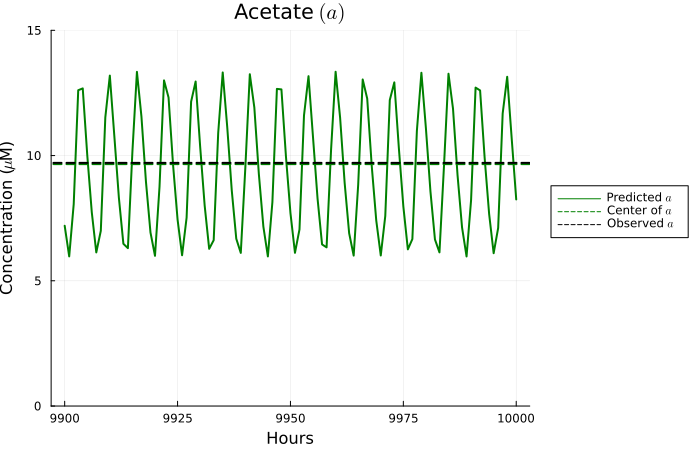

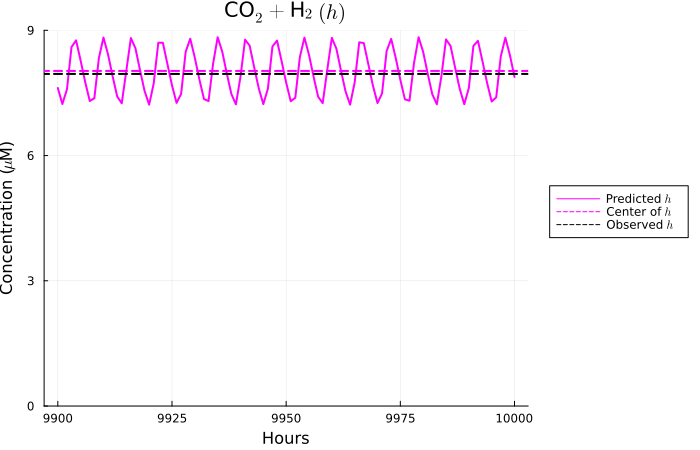

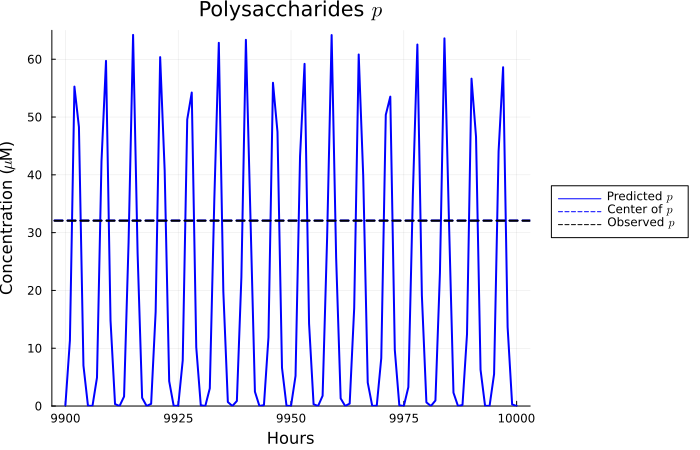

In [334]:
vars = ["Acetate "*L"(a)", "CO"*L"_2 +" *"H"*L"_2"*" "*L"(h)", "Polysaccharides "*L"p"]
short_vars = [L"a", L"h", L"p"]
not_latex_vars = ["a", "h", "p"]
ylims = [15,9,65]
colors = ["green", "magenta", "blue"]
for i in 4:6
    d = plot(9900.0:1.0:10000.0, sol(9900:max_t)[i,:], 
        title = vars[i-3], 
        ylim = (0,ylims[i-3]), 
        label = "Predicted "*short_vars[i-3],
        color = colors[i-3],
        ylabel = "Concentration (" *L"\mu" * "M)",
        xlabel = "Hours",
        lw=2,
    legend = :outerright,
    size = (1400/2,900/2))
    #d = plot(sol.t, sol[i,:], title = vars[i], legend = false)
    hline!([center(sol, 100, 10000)[i]], linestyle=:dash, color = colors[i-3], label = "Center of "*short_vars[i-3], lw = 2)
    hline!([u0[i]], linestyle=:dash, color = "black", label = "Observed "*short_vars[i-3], lw = 2)
    savefig(d,"images/"*not_latex_vars[i-3]*".png")
    display(d)
end

In [106]:
(maximum(sol[:,500:1000], dims=2) + minimum(sol[:,500:1000], dims=2))/2

6×1 Matrix{Float64}:
  0.00022985780529340317
  0.0006018889992911263
  0.0012690731508828534
  6.8719924524115665
  7.606837294467457
 30.32896372908754

In [107]:
u0

6-element Vector{Float64}:
  0.0004706
  0.0004706
  0.0004706
  9.7079
  7.9551
 32.061

In [108]:
( 6.875143072809616 -  7.9551) /  7.9551

-0.13575654953305227

# Loss function

$$\text{MAPE}_{t_1:t_2}(x,x^\text{obs}) = \frac{1}{4}\sum_{i=1}^4  \left|\frac{x-x^\text{obs}}{x^\text{obs}}\right|,$$

where $x = \left[\frac{1}{3}(\bar B + \bar E + \bar M), \bar a, \bar h, \bar p\right]$, $x^\text{obs} = \left[\frac{1}{3} (B^\text{obs} + E^\text{obs} + M^\text{obs}), a^\text{obs}, h^\text{obs}, p^\text{obs}\right]$, and $\bar z $ for some $z$ can be defined as $\bar z = \frac{1}{2}\big(\text{max}(z_{t_1:t_2}) + \text{min}(z_{t_1:t_2})\big)$.

In [109]:
function loss(truth, sol, tpts, max_t)#, truth, t_start, t_end, weight)
    """ loss computes MAPE (averaged across timepoints length(sol) - tpts  to length(sol)) and ground truth weighted by a weight vector
    truth (Vector): vector containing the ground truth
    pred (Matrix): matrix with shape (variables, timepoints)
    t_start (integer): first timepoint to pull to compute an average across time
    t_end (integer): last timepoint to pull to compute an average across time
    """
    #return sum((truth-mean(sol[:,t_start:t_end], dims=2)).^2 ./weight )#(u0-mean(sol[:,t_start:t_end], dims=2))./ weight
    
    # compare the average observation for B, E, M and the predicted average center values for B, E, M
    #println(abs((sum(truth[1:3]) - sum(center(sol, tpts,max_t)[1:3,:])) ./sum(truth[1:3])))
    #println(broadcast(abs, (truth[4:6]-center(sol, tpts,max_t)[4:6,:]) ./ truth[4:6] ))
    
    s = abs((sum(truth[1:3]) - sum(center(sol, tpts,max_t)[1:3,:])) ./sum(truth[1:3]))
    return (s + sum(broadcast(abs, (truth[4:6]-center(sol, tpts,max_t)[4:6,:]) ./ truth[4:6] )))/4
end

loss (generic function with 1 method)

In [110]:
center(sol, tpts, max_t) = (maximum(sol((max_t-tpts):max_t), dims=2) + minimum(sol((max_t-tpts):max_t), dims=2))/2

center (generic function with 1 method)

In [111]:
truth = u0
tpts=500
max_t =1500

1500

In [112]:
println(abs((sum(truth[1:3]) - sum(center(sol, tpts,max_t)[1:3,:])) ./sum(truth[1:3]))) 
println(sum(broadcast(abs, (truth[4:6]-center(sol, tpts,max_t)[4:6,:]) ./ truth[4:6] )))

0.47166098051618127
0.37141751376638593


In [113]:
sum(center(sol, tpts,max_t)[1:3,:]) ./sum(truth[1:3])

1.4716609805161813

In [114]:
size(sol[1:3,:])[2]

71694

In [115]:
#abs(sum(truth[1:3]) - sum(center(sol, tpts,max_t)[1:3,:])) ./sum(truth[1:3])
sum((truth[4:6]-center(sol, tpts,max_t)[4:6,:]) ./ truth[4:6] )

0.37141751376638593

In [116]:
center(sol, 500,1500)

6×1 Matrix{Float64}:
  0.00022728744616706912
  0.0005913020481021795
  0.0012591014780234963
  6.971792991695913
  7.641455642044452
 30.45322609972326

In [117]:
loss(u0, sol, 500, 1500)

0.2107696235706418

In [118]:
# looking at the APE across the 6 variables
s = abs(sum(truth[1:3]) - sum(center(sol, tpts, max_t)[1:3,:])) ./sum(truth[1:3])
s, broadcast(abs, (truth[4:6]-center(sol, tpts, max_t)[4:6,:]) ./ truth[4:6] )

(0.47166098051618127, [0.281843344935989; 0.03942682781555831; 0.050147341014838594;;])

In [119]:
(0.47140814660926345 + 0.28185292036079607+0.03943451506605942+0.05014929065894367)/4

0.21071121817376565

# Parameter Estimation

In [120]:
using Optim
using Optimization, OptimizationOptimJL

In [121]:
function optim_problem(p, u0)
    max_t = 1500.0
    tspan = (0.0,max_t)
    prob = ODEProblem(f,u0,tspan,p)
    sol = solve(prob, Tsit5(),reltol=1e-6)
    #print(size(sol))
    tpts = 100
    #print(loss(u0, sol, tpts, max_t))
    return loss(u0, sol, tpts, max_t)
end

optim_problem (generic function with 1 method)

In [122]:
#problem = Optimization.OptimizationProblem(optim_problem, u0, p, lb = repeat([0],length(p)), ub = repeat([10000000], length(p)) )
func = OptimizationFunction(optim_problem, Optimization.AutoForwardDiff())

(::OptimizationFunction{true, Optimization.AutoForwardDiff{nothing}, typeof(optim_problem), Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing}) (generic function with 1 method)

In [123]:
upper_b =  [1e6, 10,10,10,1000,1e5,  1e5,10,10,1e5,1e4,1e4,1e4,1e4,1e6,1e6,1e5,1e8,1e8,10]# 
lower_b = repeat([0],length(p));
#upper_b = repeat([1e8],20)

In [124]:
problem = Optimization.OptimizationProblem(func,  p, u0, lb = lower_b,   ub = upper_b)

OptimizationProblem. In-place: true
u0: 20-element Vector{Float64}:
 300000.0
      1.2
      0.8
      0.6
    400.0
  33000.0
  10000.0
      0.827
      0.5
   1000.0
    200.0
     10.0
    150.0
    400.0
  50000.0
  40000.0
   3000.0
 200000.0
      5.0e6
      0.05

In [125]:
param_est_sol = solve(problem,Optim.NelderMead())

u: 20-element Vector{Float64}:
 321566.87611319136
      1.2774770078114142
      0.8489437854045051
      0.5233536695830242
    411.9818277999729
  32571.557326722977
  10029.057599517102
      0.7498105601733449
      0.45640782010436765
   1064.8766326102668
    238.42266052587559
     11.232398105408688
    132.62657587001306
    411.9677212175805
  49647.963412910925
  39040.56968891347
   3309.6448349033217
 341298.99026815064
      5.243171833224267e6
      0.05429113379002673

In [126]:
param_est_sol =  [321566.87611319136
      1.2774770078114142
      0.8489437854045051
      0.5233536695830242
    411.9818277999729
  32571.557326722977
  10029.057599517102
      0.7498105601733449
      0.45640782010436765
   1064.8766326102668
    238.42266052587559
     11.232398105408688
    132.62657587001306
    411.9677212175805
  49647.963412910925
  39040.56968891347
   3309.6448349033217
 341298.99026815064
      5.243171833224267e6
      0.05429113379002673]

20-element Vector{Float64}:
 321566.87611319136
      1.2774770078114142
      0.8489437854045051
      0.5233536695830242
    411.9818277999729
  32571.557326722977
  10029.057599517102
      0.7498105601733449
      0.45640782010436765
   1064.8766326102668
    238.42266052587559
     11.232398105408688
    132.62657587001306
    411.9677212175805
  49647.963412910925
  39040.56968891347
   3309.6448349033217
 341298.99026815064
      5.243171833224267e6
      0.05429113379002673

In [127]:
optim_problem(param_est_sol, u0)

6.867845618330287e-8

In [128]:
using JLD2
save("params.jld2", "data", param_est_sol)

In [137]:
sol(7500:max_t)

t: 7500.0:1.0:10000.0
u: 2501-element Vector{Vector{Float64}}:
 [0.0001669036590421436, 0.0006285664649624764, 0.000468781645677978, 6.8835093786351775, 7.533343554302558, 0.44088669481222176]
 [0.00016090035088253582, 0.0006128438229351154, 0.0004635728238414978, 6.009384056137881, 7.218855185444233, 17.26690382813063]
 [0.00017045397099599765, 0.0006227340452208873, 0.0004596008777558423, 8.874906787951028, 7.755682066280146, 60.99833568831972]
 [0.00018857175106828562, 0.000652998089809393, 0.00046245473207904344, 13.057011978341079, 8.716987302340046, 39.38002407018022]
 [0.00018835766586236343, 0.0006605630900852088, 0.00046848891781778567, 12.252283311970054, 8.690414956294376, 3.9402311608750478]
 [0.00017890949758337437, 0.0006500459164856767, 0.00047119975345472694, 9.568879700349004, 8.178952379580174, 0.012628582284614392]
 [0.00016945914192092323, 0.0006338161277183353, 0.0004698095504518438, 7.394347350909116, 7.670286497522375, 0.05914177154166583]
 [0.0001616550697537452

In [153]:
length(sol.t)#

51082

In [154]:
sol(7500:max_t)

t: 7500.0:1.0:10000.0
u: 2501-element Vector{Vector{Float64}}:
 [0.0001669036590421436, 0.0006285664649624764, 0.000468781645677978, 6.8835093786351775, 7.533343554302558, 0.44088669481222176]
 [0.00016090035088253582, 0.0006128438229351154, 0.0004635728238414978, 6.009384056137881, 7.218855185444233, 17.26690382813063]
 [0.00017045397099599765, 0.0006227340452208873, 0.0004596008777558423, 8.874906787951028, 7.755682066280146, 60.99833568831972]
 [0.00018857175106828562, 0.000652998089809393, 0.00046245473207904344, 13.057011978341079, 8.716987302340046, 39.38002407018022]
 [0.00018835766586236343, 0.0006605630900852088, 0.00046848891781778567, 12.252283311970054, 8.690414956294376, 3.9402311608750478]
 [0.00017890949758337437, 0.0006500459164856767, 0.00047119975345472694, 9.568879700349004, 8.178952379580174, 0.012628582284614392]
 [0.00016945914192092323, 0.0006338161277183353, 0.0004698095504518438, 7.394347350909116, 7.670286497522375, 0.05914177154166583]
 [0.0001616550697537452

In [162]:
max_t = 10000.0
tspan = (0.0,max_t)
prob = ODEProblem(f,u0,tspan,param_est_sol)
sol = solve(prob)

In [181]:
#using Pkg; Pkg.add("LaTeXStrings")
using LaTeXStrings

   Resolving package versions...
    Updating `/global/u1/m/maadrian/.julia/nersc/perlmutter/environments/v1.8/Project.toml`
  [b964fa9f] + LaTeXStrings v1.3.0
  No Changes to `/global/u1/m/maadrian/.julia/nersc/perlmutter/environments/v1.8/Manifest.toml`


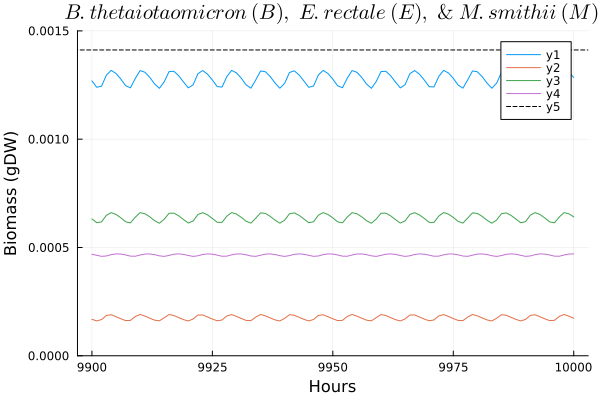

In [200]:
plot(9900.0:1.0:10000.0, sol(9900:max_t)[1,:] + sol(9900:max_t)[2,:] + sol(9900:max_t)[3,:], 
    title = L"\textit{B. thetaiotaomicron} \ (B), \ \textit{E. rectale} \ (E), \ & \ \textit{M. smithii} \ (M) ", 
    ylim=(0, 0.0015),
    xlabel = "Hours",
    ylabel = "Biomass (gDW)")
plot!(9900.0:1.0:10000.0, sol(9900:max_t)[1,:] )
plot!(9900.0:1.0:10000.0, sol(9900:max_t)[2,:] )
plot!(9900.0:1.0:10000.0, sol(9900:max_t)[3,:] )
hline!([sum(u0[1:3])], linestyle=:dash, color = "black")


In [170]:
u0[1:3]

3-element Vector{Float64}:
 0.0004706
 0.0004706
 0.0004706

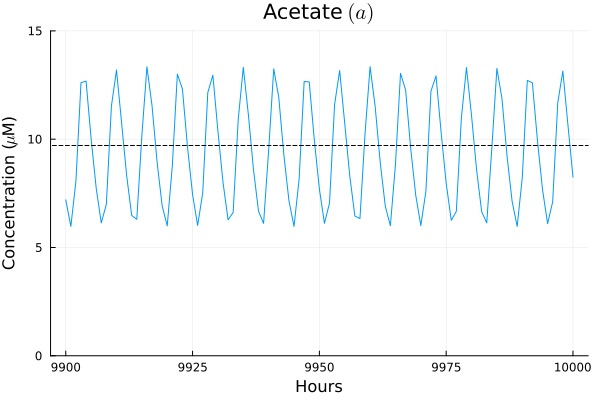

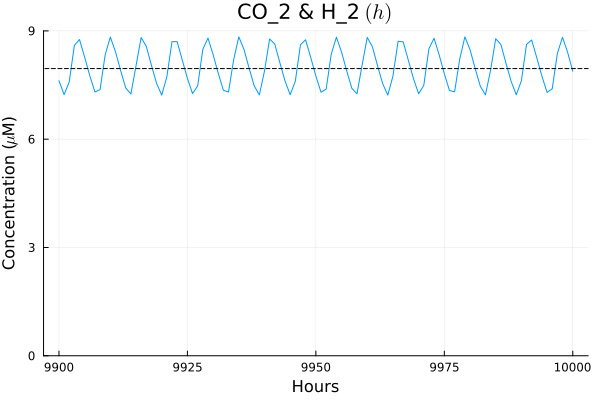

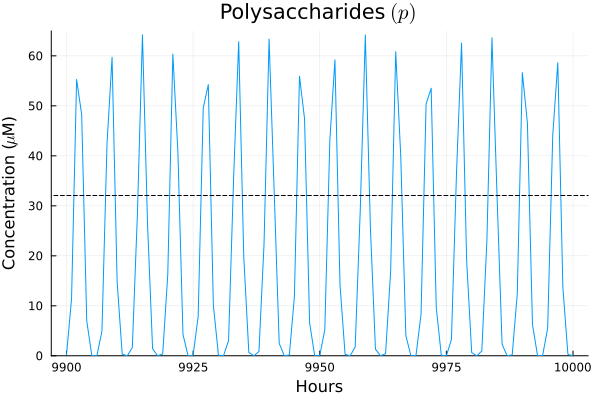

In [197]:
vars = ["B. thetaiotaomicron (B)", "E. rectale (E)", "M. smithii (M)", "Acetate "*L"(a)", "CO_2 & H_2 "*L"(h)", "Polysaccharides "*L"(p)"]
colors = ["green", ]
ylims = [15, 9,65]
for i in 4:6
    d = plot(9900.0:1.0:10000.0, sol(9900:max_t)[i,:], 
        title = vars[i], 
        legend = false, 
        ylim=(0, ylims[i-3]),
        xlabel = "Hours",
        ylabel = "Concentration ("* L"\mu "* "M)")
    hline!([sum(u0[i])], linestyle=:dash, color = "black")

    display(d)
end

In [46]:
loss(truth, sol, 500, 10000)

0.026711618128493476

In [ ]:
#constrained simulated annealing

#param_est_sol_SA = solve(problem,Optim.SAMIN(), maxiters=50000) #Optim.SimulatedAnnealing()) #

In [ ]:
param_est_sol_SA

In [64]:
using ArgParse

LoadError: ArgumentError: Package ArgParse not found in current path.
- Run `import Pkg; Pkg.add("ArgParse")` to install the ArgParse package.

# Sensitivity Analysis

In [ ]:
using Pkg; Pkg.add("QuasiMonteCarlo")#Pkg.add("GlobalSensitivity")


In [47]:
using GlobalSensitivity, QuasiMonteCarlo

In [48]:
#center(sol, tpts, max_t) = (maximum(sol((max_t-tpts):max_t), dims=2) + minimum(sol((max_t-tpts):max_t), dims=2))/2

In [49]:
sampler = SobolSample()
A,B = QuasiMonteCarlo.generate_design_matrices(10,lower_b,upper_b,sampler)

2-element Vector{Matrix{Float64}}:
 [187500.0 687500.0 … 93750.0 593750.0; 3.125 8.125 … 4.6875 9.6875; … ; 9.375e7 4.375e7 … 7.8125e7 2.8125e7; 3.125 8.125 … 0.3125 5.3125]
 [187500.0 687500.0 … 718750.0 218750.0; 6.875 1.875 … 9.0625 4.0625; … ; 3.125e7 8.125e7 … 3.125e6 5.3125e7; 5.625 0.625 … 9.0625 4.0625]

In [50]:
A

20×10 Matrix{Float64}:
 187500.0      687500.0      937500.0      …   93750.0       593750.0
      3.125         8.125         0.625            4.6875         9.6875
      9.375         4.375         6.875            4.6875         9.6875
      4.375         9.375         1.875            6.5625         1.5625
    562.5          62.5         312.5            281.25         781.25
  31250.0       81250.0       56250.0      …   96875.0        46875.0
  43750.0       93750.0       18750.0          53125.0         3125.0
      9.375         4.375         1.875            8.4375         3.4375
      9.375         4.375         1.875            4.6875         9.6875
  31250.0       81250.0       56250.0          15625.0        65625.0
   6875.0        1875.0        4375.0      …     937.5         5937.5
    625.0        5625.0        8125.0           4062.5         9062.5
   9375.0        4375.0        6875.0           6562.5         1562.5
   9375.0        4375.0        6875.0           656

In [51]:
function sample(p)
    # p has shape (params, # samples)
    l = size(p)[2]
    u0 = [0.0004706; 0.0004706; 0.0004706; 9.7079; 7.9551; 32.061]
    max_t = 7500.0
    tspan = (0.0,max_t)
    prob = [ODEProblem(f,u0,tspan,p[:,n]) for n in 1:l]
    sol = [solve(prob[n], abstol = 1e-10, reltol = 1e-10) for n in 1:l]
    #print(size(sol))
    tpts = 100
    #print(loss(u0, sol, tpts, max_t))
    return [center(sol[n], tpts, max_t) for n in 1:l] #loss(u0, sol, tpts, max_t)
end

sample (generic function with 1 method)

In [52]:
p = repeat(param_est_sol, outer = [1, 1])

sample(p)[1]

6×1 Matrix{Float64}:
  0.0001775198374709923
  0.0006305319322998368
  0.0004747407279783205
  9.661372868976786
  8.023836456905274
 32.110059890612156

AutoTsit5(Rosenbrock23()) handles both stiff and non-stiff equations. This is a good algorithm to use if you know nothing about the equation.
AutoVern7(Rodas5()) handles both stiff and non-stiff equations in a way that's efficient for high accuracy.
Tsit5() for standard non-stiff. This is the first algorithm to try in most cases.
BS3() for fast low accuracy non-stiff.
Vern7() for high accuracy non-stiff.
Rodas4() or Rodas5() for small stiff equations with Julia-defined types, events, etc.
KenCarp4() or TRBDF2() for medium-sized (100-2000 ODEs) stiff equations
RadauIIA5() for really high accuracy stiff equations
QNDF() for large stiff equations

In [ ]:
function sample(p)
    # p has shape (params, # samples)
    l = size(p)[2]
    u0 = [0.0004706; 0.0004706; 0.0004706; 9.7079; 7.9551; 32.061]
    max_t = 7500.0
    tspan = (0.0,max_t)
    prob = [ODEProblem(f,u0,tspan,p[:,n]) for n in 1:l]
    sol = [solve(prob[n], abstol = 1e-10, reltol = 1e-10) for n in 1:l]
    #print(size(sol))
    tpts = 100
    #print(loss(u0, sol, tpts, max_t))
    return [center(sol[n], tpts, max_t) for n in 1:l] #loss(u0, sol, tpts, max_t)
end

In [54]:
samples = 60
sampler = SobolSample()
A,B = QuasiMonteCarlo.generate_design_matrices(samples,lower_b,upper_b,sampler)

res1 = gsa(sample,Sobol(order=[0,1]),A,B; batch = true)

┌ Warning: Interrupted. Larger maxiters is needed. If you are using an integrator for non-stiff ODEs or an automatic switching algorithm (the default), you may want to consider using a method for stiff equations. See the solver pages for more details (e.g. https://diffeq.sciml.ai/stable/solvers/ode_solve/#Stiff-Problems).
└ @ SciMLBase /global/homes/m/maadrian/.julia/nersc/perlmutter/packages/SciMLBase/mOGJz/src/integrator_interface.jl:502
┌ Warning: Interrupted. Larger maxiters is needed. If you are using an integrator for non-stiff ODEs or an automatic switching algorithm (the default), you may want to consider using a method for stiff equations. See the solver pages for more details (e.g. https://diffeq.sciml.ai/stable/solvers/ode_solve/#Stiff-Problems).
└ @ SciMLBase /global/homes/m/maadrian/.julia/nersc/perlmutter/packages/SciMLBase/mOGJz/src/integrator_interface.jl:502
┌ Warning: Interrupted. Larger maxiters is needed. If you are using an integrator for non-stiff ODEs or an autom

LoadError: InterruptException:

In [15]:
@time begin
    samples = 5
    sampler = SobolSample()
    A,B = QuasiMonteCarlo.generate_design_matrices(samples,lower_b,upper_b,sampler)

    res5 = gsa(sample,Sobol(order=[0,1]),A,B)
end



LoadError: BoundsError: attempt to access Tuple{Int64} at index [2]

In [ ]:
# batched
@time begin
    samples = 5
    sampler = SobolSample()
    A,B = QuasiMonteCarlo.generate_design_matrices(samples,lower_b,upper_b,sampler)

    res5 = gsa(sample,Sobol(order=[0,1]),A,B)
end

In [17]:
@time begin
    samples = 10
    sampler = SobolSample()
    A,B = QuasiMonteCarlo.generate_design_matrices(samples,lower_b,upper_b,sampler)

    res10 = gsa(sample,Sobol(order=[0,1]),A,B)
end



124.936401 seconds (927.53 M allocations: 98.400 GiB, 35.00% gc time)


┌ Warning: Interrupted. Larger maxiters is needed. If you are using an integrator for non-stiff ODEs or an automatic switching algorithm (the default), you may want to consider using a method for stiff equations. See the solver pages for more details (e.g. https://diffeq.sciml.ai/stable/solvers/ode_solve/#Stiff-Problems).
└ @ SciMLBase /global/homes/m/maadrian/.julia/nersc/perlmutter/packages/SciMLBase/mOGJz/src/integrator_interface.jl:502
┌ Warning: Interrupted. Larger maxiters is needed. If you are using an integrator for non-stiff ODEs or an automatic switching algorithm (the default), you may want to consider using a method for stiff equations. See the solver pages for more details (e.g. https://diffeq.sciml.ai/stable/solvers/ode_solve/#Stiff-Problems).
└ @ SciMLBase /global/homes/m/maadrian/.julia/nersc/perlmutter/packages/SciMLBase/mOGJz/src/integrator_interface.jl:502
┌ Warning: Interrupted. Larger maxiters is needed. If you are using an integrator for non-stiff ODEs or an autom

GlobalSensitivity.SobolResult{Matrix{Float64}, Nothing, Nothing, Nothing}([0.0 5.2744146842939334e-55 … 0.0 7.07081308813e-312; -0.0 -0.0 … 0.0 1.1413000981546593e-12; … ; -1.1688949503967646e-82 6.003198107549783e-28 … -7.723072415472669e-79 1.1021698064011574e-12; 7.2159449128385e-17 1.3250390602741246e-19 … 1.768512942050468e-15 -1.7205137492387355e-14], nothing, nothing, nothing, [1.178062734526257e-9 0.4184948817674143 … -6.978135586652762e-13 -2.7441033513735397e11; 0.021999994163298453 4.103609565463346e-6 … -0.7139258256680222 1.1424545013534262e-27; … ; 0.02199998843893582 4.114088119050582e-6 … -0.7139258402027089 -1.7369233156134623e-13; 0.021903873799339276 4.022132749637059e-5 … 0.5368289913944725 2.587831680958343e-12], nothing)

In [18]:
@time begin
    samples = 20
    sampler = SobolSample()
    A,B = QuasiMonteCarlo.generate_design_matrices(samples,lower_b,upper_b,sampler)

    res20 = gsa(sample,Sobol(order=[0,1]),A,B)
end



┌ Warning: Interrupted. Larger maxiters is needed. If you are using an integrator for non-stiff ODEs or an automatic switching algorithm (the default), you may want to consider using a method for stiff equations. See the solver pages for more details (e.g. https://diffeq.sciml.ai/stable/solvers/ode_solve/#Stiff-Problems).
└ @ SciMLBase /global/homes/m/maadrian/.julia/nersc/perlmutter/packages/SciMLBase/mOGJz/src/integrator_interface.jl:502
┌ Warning: Interrupted. Larger maxiters is needed. If you are using an integrator for non-stiff ODEs or an automatic switching algorithm (the default), you may want to consider using a method for stiff equations. See the solver pages for more details (e.g. https://diffeq.sciml.ai/stable/solvers/ode_solve/#Stiff-Problems).
└ @ SciMLBase /global/homes/m/maadrian/.julia/nersc/perlmutter/packages/SciMLBase/mOGJz/src/integrator_interface.jl:502
┌ Warning: Interrupted. Larger maxiters is needed. If you are using an integrator for non-stiff ODEs or an autom

295.878216 seconds (2.10 G allocations: 222.245 GiB, 34.81% gc time)


┌ Warning: Interrupted. Larger maxiters is needed. If you are using an integrator for non-stiff ODEs or an automatic switching algorithm (the default), you may want to consider using a method for stiff equations. See the solver pages for more details (e.g. https://diffeq.sciml.ai/stable/solvers/ode_solve/#Stiff-Problems).
└ @ SciMLBase /global/homes/m/maadrian/.julia/nersc/perlmutter/packages/SciMLBase/mOGJz/src/integrator_interface.jl:502
┌ Warning: Interrupted. Larger maxiters is needed. If you are using an integrator for non-stiff ODEs or an automatic switching algorithm (the default), you may want to consider using a method for stiff equations. See the solver pages for more details (e.g. https://diffeq.sciml.ai/stable/solvers/ode_solve/#Stiff-Problems).
└ @ SciMLBase /global/homes/m/maadrian/.julia/nersc/perlmutter/packages/SciMLBase/mOGJz/src/integrator_interface.jl:502
┌ Warning: Interrupted. Larger maxiters is needed. If you are using an integrator for non-stiff ODEs or an autom

GlobalSensitivity.SobolResult{Matrix{Float64}, Nothing, Nothing, Nothing}([-0.0 2577.0308190425917 … 0.0 1.1927897139395602e-33; 1.7356539189172098e-24 -9.711259523473532e-18 … -5.9761585003773845e-18 -0.3674154346747859; … ; -1.0966321082844376e-17 157.65402382999176 … -4.364036374572562e-17 -1.0949951866264318; 3.4119130325480194e-18 62.39604014983417 … 8.651768042175803e-18 -0.13462174147326136], nothing, nothing, nothing, [2.5512320396835642e-39 9.130073261837203e-31 … -1.603163574363043e-42 -5.9415010761346585e-19; 0.7333157324551435 1.1092615186732875 … 1.742522999020544 -9.053744103262503; … ; 0.7173326082692543 1.08498634747334 … 1.689709665806487 -8.856411641290517; 0.7231572159171534 1.0944554780461118 … 1.833747739843049 -8.929247010511636], nothing)

In [15]:
res1.ST

6×20 Matrix{Float64}:
 0.304756    1.98298      0.0132983   …   0.0104651   0.0393012   19.4522
 0.00883446  0.0162829   -0.0874853       0.0162439   0.0103239    0.0162424
 1.46184e-8  2.37688e-7   1.5034e-8       3.68529e-8  1.90393e-9   1.5034e-8
 1.2908      1.95893      0.00826939      0.0104277   0.0388876   19.2154
 0.297281    1.93279      0.0024706       0.0108985   0.0387503   18.9536
 0.298878    1.94203     -0.00858469  …  -0.0252413   0.0393195   19.0391

In [ ]:
using GlobalSensitivity, QuasiMonteCarlo, OrdinaryDiffEq, Statistics, CairoMakie

function f(du,u,p,t)
  du[1] = p[1]*u[1] - p[2]*u[1]*u[2] #prey
  du[2] = -p[3]*u[2] + p[4]*u[1]*u[2] #predator
end

u0 = [1.0;1.0]
tspan = (0.0,10.0)
p = [1.5,1.0,3.0,1.0]
prob = ODEProblem(f,u0,tspan,p)
t = collect(range(0, stop=10, length=200))


f1 = function (p)
    prob1 = remake(prob;p=p)
    sol = solve(prob1,Tsit5();saveat=t)
    return [mean(sol[1,:]), maximum(sol[2,:])]
end

bounds = [[1,5],[1,5],[1,5],[1,5]]

In [ ]:
reg_sens = gsa(f1, RegressionGSA(true), bounds, samples = 200)
#fig = Figure(resolution = (600, 400))
#ax, hm = CairoMakie.heatmap(fig[1,1], reg_sens.partial_correlation, axis = (xticksvisible = false,yticksvisible = false, yticklabelsvisible = false, xticklabelsvisible = false, title = "Partial correlation"))
#Colorbar(fig[1, 2], hm)
#ax, hm = CairoMakie.heatmap(fig[2,1], reg_sens.standard_regression, axis = (xticksvisible = false,yticksvisible = false, yticklabelsvisible = false, xticklabelsvisible = false, title = "Standard regression"))
#Colorbar(fig[2, 2], hm)
#fig

In [ ]:
reg_sens.standard_regression

In [10]:
using QuasiMonteCarlo
# specify the upper and lower limits of the parameter ranges
upper_b =  [1,1,1]
lower_b = repeat([0],length(upper_b))

# sample A and B
sampler =LatticeRuleSample() # generates a sample -- seed is not fixed so we will get different draws every time this is called
A = QuasiMonteCarlo.sample(5, lower_b, upper_b, sampler)
B = QuasiMonteCarlo.sample(5, lower_b, upper_b, sampler) # A, B are shapes (# params, num_samples)


3×5 Matrix{Float64}:
 0.625413  0.125413  0.875413  0.375413  0.750413
 0.713317  0.213317  0.463317  0.963317  0.0883173
 0.659104  0.159104  0.409104  0.909104  0.0341036

In [11]:
A

3×5 Matrix{Float64}:
 0.1934    0.6934    0.4434    0.9434    0.3184
 0.245919  0.745919  0.995919  0.495919  0.620919
 0.744661  0.244661  0.494661  0.994661  0.119661

In [12]:
B

3×5 Matrix{Float64}:
 0.625413  0.125413  0.875413  0.375413  0.750413
 0.713317  0.213317  0.463317  0.963317  0.0883173
 0.659104  0.159104  0.409104  0.909104  0.0341036

In [13]:
function Ci(i, A, B)    
    B[i,:] = A[i,:]
    return B
end


Ci (generic function with 1 method)

In [14]:
Ci(1,A,B)

3×5 Matrix{Float64}:
 0.1934    0.6934    0.4434    0.9434    0.3184
 0.713317  0.213317  0.463317  0.963317  0.0883173
 0.659104  0.159104  0.409104  0.909104  0.0341036